In [72]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns


class print_format():
    def __init__(self,text):
        PURPLE = '\033[95m'
        CYAN = '\033[96m'
        DARKCYAN = '\033[36m'
        BLUE = '\033[94m'
        GREEN = '\033[92m'
        YELLOW = '\033[93m'
        RED = '\033[91m'
        BOLD = '\033[1m'
        UNDERLINE = '\033[4m'
        END = '\033[0m'

        print(BOLD + text + END)

class Regression():
    
    def __init__(self,csv_file_name):
        self.csv_file_name=csv_file_name
        
        self.dataframe()
        
        self.create_custom_feature() # !WARNING: custom 
        
        self.create_final_dataset()
        
        self.display_info(self.final_dataset)
        
        self.select_input_output(self.final_dataset) # !WARNING: custom
    
        #to understand important feature
        self.my_model()
        
        self.train()
        
        
        
    def train(self):
        from sklearn.model_selection import RandomizedSearchCV
        from sklearn.model_selection import train_test_split
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.input,self.output,test_size=0.2)
        from sklearn.ensemble import RandomForestRegressor
        rf_random=RandomForestRegressor()
        
        #Randomized Search CV

        # Number of trees in random forest
        n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
        # Number of features to consider at every split
        max_features = ['auto', 'sqrt']
        # Maximum number of levels in tree
        max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
        # max_depth.append(None)
        # Minimum number of samples required to split a node
        min_samples_split = [2, 5, 10, 15, 100]
        # Minimum number of samples required at each leaf node
        min_samples_leaf = [1, 2, 5, 10]   
        
        # Create the random grid
        random_grid = {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf}

        print(random_grid)
        
        # Use the random grid to search for best hyperparameters
        # First create the base model to tune
        rf = RandomForestRegressor()
        
        rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
        
        rf_random.fit(self.X_train,self.y_train)
        
        self.rf=rf_random
        
        return self
    def my_model(self):
        from sklearn.ensemble import ExtraTreesRegressor
        self.model=ExtraTreesRegressor()
        self.model.fit(self.input,self.output)
        print("<the important features are {}".format(self.model.feature_importances_))
        return self
    
    def dataframe(self):
        self.df=pd.read_csv(self.csv_file_name)
        
        #self.df=pd.get_dummies(self.df,drop_first=True)

        return self
    
    def drop(self,name):
        
        # This will drop a column. "Inplace" is given to replace another step of assignment
        # axis=1 is for column and axis=0 is for rows
        
        self.df.drop(name, axis=1, inplace=True)
    
    def create_custom_feature(self):
        
        #Edit this based on problem
        
        self.df["Current_Year"]=2020
        self.df["no_year"]=self.df["Current_Year"]-self.df["Year"]
        
        self.drop("Current_Year")
        #self.drop("year")
        self.drop("Car_Name")
        self.drop('Year')
        
        return self
        
    def display_info(self,df):
        
        self.current_df=df
        
        #display data of first five rows
        print("\n")
        print_format("First Five Rows of Data")
        #print(self.df.head())
        print(self.current_df.head(n=2).to_string(index=False))
        print("\n __________________________________________________")
        print("\n")
        
        
        #display features and records
        
        print_format("Features and Records")
        print("\n")
        print("It has {} records and {} features".format(self.current_df.shape[0],self.df.shape[1]))
        print("\n __________________________________________________")
        print("\n")
        
        #display if any null values
        
        print_format("Null Values")
        print("\n")
        print(self.current_df.isnull().sum())
        print("\n __________________________________________________")
        print("\n")
        
        #display heatmap
        
        print_format("Correlation Heat Map")
        print("\n")
        self.corr_matrix=self.current_df.corr()
        self.features=self.corr_matrix.index
        plt.figure(figsize=(10,15))
        sns.heatmap((self.current_df[self.features]).corr(),annot=True,cmap="RdYlGn")
        print("\n __________________________________________________")
        print("\n")
        
        
        
        #return self
    
    def print_unique_features(self,name):
        
        print(obj.df[name].unique())
        
    
    def create_final_dataset(self):
        
        self.final_dataset=pd.get_dummies(self.df,drop_first=True)
        
        return self
    
    def select_input_output(self,final_dataset):
      
        df=final_dataset
        
        self.input=df.iloc[:,1:]
        
        self.output=df.iloc[:,0]



First Five Rows of Data
 Selling_Price  Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual
          3.35           5.59       27000      0        6                 0                 1                       0                    1
          4.75           9.54       43000      0        7                 1                 0                       0                    1

 __________________________________________________


Features and Records


It has 301 records and 8 features

 __________________________________________________


Null Values


Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
no_year                   0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

 __________________________________________________


Correlation Heat Map



 _______________________________

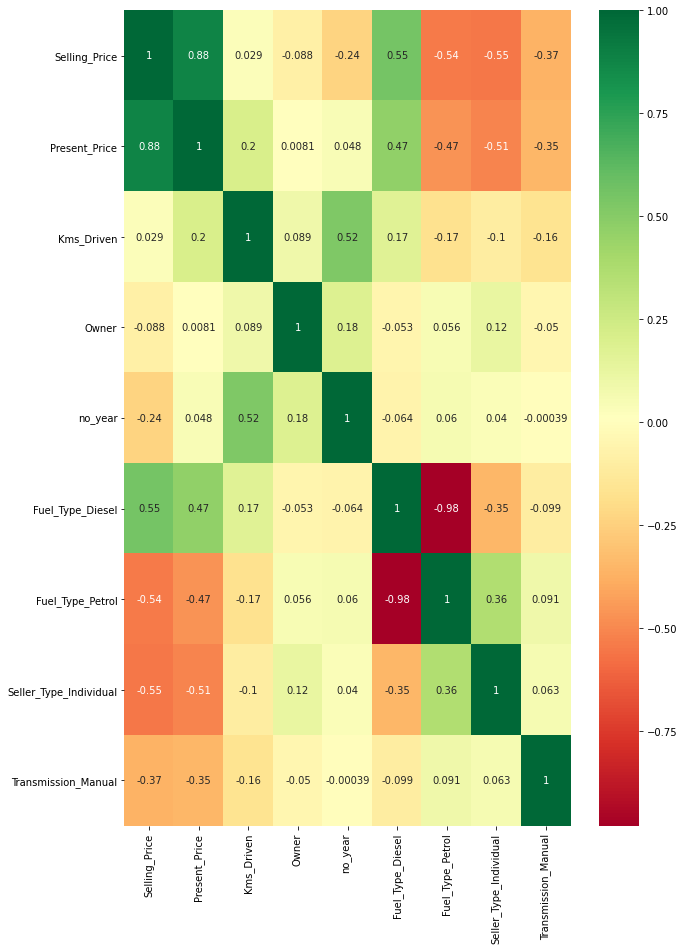

In [73]:
obj=Regression("car_details.csv")
#pd.get_dummies(obj.df)

In [75]:
import pickle
file=open('random_forest_regression_model.pkl','wb')
pickle.dump(rf,file)

In [74]:
rf=obj.rf

In [71]:
obj.final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,6,0,1,0,1
1,2013,4.75,9.54,43000,0,7,1,0,0,1
2,2017,7.25,9.85,6900,0,3,0,1,0,1
3,2011,2.85,4.15,5200,0,9,0,1,0,1
4,2014,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,4,1,0,0,1
297,2015,4.00,5.90,60000,0,5,0,1,0,1
298,2009,3.35,11.00,87934,0,11,0,1,0,1
299,2017,11.50,12.50,9000,0,3,1,0,0,1


In [53]:
rf.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [36]:
pd.get_dummies(obj.df,drop_first=True)

,selling_price,km_driven,No_Year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,6,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,6,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,11,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,4,1,0,0,0,1,0,1,0,0,0,0


In [30]:
obj.display_info()



First Five Rows of Data
   year  selling_price  km_driven    fuel seller_type transmission  \
0  2007          60000      70000  Petrol  Individual       Manual   
1  2007         135000      50000  Petrol  Individual       Manual   
2  2012         600000     100000  Diesel  Individual       Manual   
3  2017         250000      46000  Petrol  Individual       Manual   
4  2014         450000     141000  Diesel  Individual       Manual   

          owner  
0   First Owner  
1   First Owner  
2   First Owner  
3   First Owner  
4  Second Owner  

 __________________________________________________


Features and Records


It has 4340 records and 7 features

 __________________________________________________


Null Values


year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

 __________________________________________________




In [28]:
model = pickle.load(open('random_forest_regression_model.pkl', 'rb'))

In [55]:
obj.input

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,4.75,9.54,43000,0,7,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.85,4.15,5200,0,9,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,4.60,6.87,42450,0,6,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
297,4.00,5.90,60000,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
298,3.35,11.00,87934,0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
299,11.50,12.50,9000,0,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
